In [64]:
from sympy import *
import inspect
import numpy as np
from fractions import Fraction
init_printing()
%run -i symbol_func_spaces.py


In [65]:
s=Symbol("s")
p=Symbol("p")
n=Symbol("n")
q=Symbol("q")
f=Symbol("f")
g=Symbol("g")
alpha=Symbol("alpha")
r=Symbol("r")
k=Symbol("k")
l=Symbol("l")
j=Symbol("j")

In [66]:
nabla=Symbol("nabla")
lap=Symbol("triangle")

In [67]:
nabla

In [68]:
class Freq_proj_base(Function):
    @classmethod
    def eval(cls, k, f):
       pass

    def _latex(self, printer):
        k, f = self.args
        _k, _f = printer._print(k), printer._print(f)    
        return r'P_{%s}%s' % (_k, _f)

In [69]:
class Freq_proj(Function):
    @classmethod
    def eval(cls, k, f):
       if len(f.args)>1:
            if f.args[1]==Symbol("nabla"):
                return 2**k *Freq_proj_base(k,f.args[0])
            if f.args[1]==Symbol("triangle"):
                return 2**(2*k) *Freq_proj_base(k,f.args[0])
       else:
             return Freq_proj_base(k,f)

In [70]:
Freq_proj(2,nabla*f)

In [71]:
Freq_proj(k,nabla*f) 

In [72]:
Freq_proj(k,nabla*f)  * Freq_proj(k,lap*g)

In [73]:
Freq_proj(k,f)

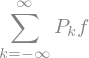

In [74]:
summation(Freq_proj(k,f), (k, -oo, oo))

In [75]:
Freq_proj(k,nabla*g) 

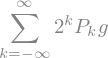

In [76]:
summation(Freq_proj(k,nabla*g), (k, -oo, oo))

In [77]:
class Paraproduct(Function):
    @classmethod
    def eval(cls,f,g):
       pass
    def _latex(self, printer):
         f,g = self.args
         pf_h,pg_h,pf_l,pg_l=Freq_proj(k,f),Freq_proj(k,g),Freq_proj(j,f),Freq_proj(j,g)
         _pf_h,_pg_h,_k = printer._print(pf_h), printer._print(pg_h), printer._print(k)
         _pf_l,_pg_l = printer._print(pf_l), printer._print(pg_l)
         return r'\sum_{k} (%s  %s) + \sum_{k} \sum_{j<k-10} (%s %s) +  \sum_{k} \sum_{j<k-10} (%s %s)' %(_pf_h,_pg_h,_pf_l,_pg_h,_pg_l,_pf_h)


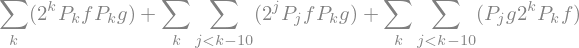

In [78]:
Paraproduct(nabla*f,g)

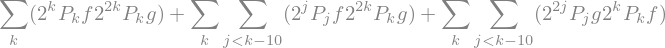

In [79]:
Paraproduct(nabla*f,lap*g)

In [88]:
class Para_hh(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(Freq_proj(k,f)*Freq_proj(k,g), (k, -oo, oo))

In [92]:
class Para_hl(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(summation(Freq_proj(k,f)*Freq_proj(j,g), (j, -oo,k-10)),(k, -oo, oo))

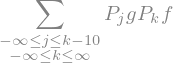

In [93]:
Para_hl(f,g)

In [94]:
class Para_lh(Function):
    @classmethod
    def eval(cls,f,g):
       return summation(summation(Freq_proj(j,f)*Freq_proj(k,g), (j, -oo,k-10)),(k, -oo, oo))

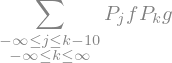

In [95]:
Para_lh(f,g)